In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
df.tail(3)

,age,sex,bmi,children,smoker,region,charges
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

this dataset contain 1338 rows and 7 columns 1 is target variable and 6 are independent variable

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

there are 3 different data sets int,float,object

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

we can see no null values in the given dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


this gives brief information about the dataset which includes indexing type,column type,no null values and memoryusage

<Axes: >

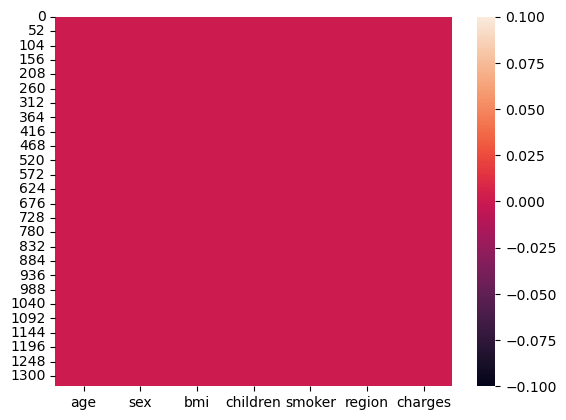

In [9]:
#visualise by use heatmap
sns.heatmap(df.isnull())

we can clearly visualise there is no missing data present in the given dataset

In [10]:
df.nunique().to_frame('No.of unique values')

,No.of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


it gives no.of unique values in given dataset

In [11]:
# check value counts in each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [12]:
# converting categorical data to numerical data
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}}
               
df = df.copy()
df.replace(clean_data, inplace=True)

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [14]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


it gves very huge gap between min,25%,50%,75%,max 

In [15]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


it gives corelation between dependent and independent variables
it can be visualise by heatmap

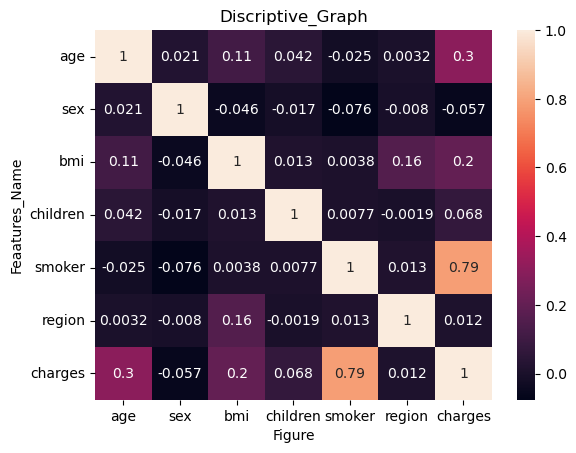

In [16]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.xlabel('Figure')
plt.ylabel('Feaatures_Name')
plt.title('Discriptive_Graph')
plt.show()

it gives sex,children,region column doesnot effect target label(charges) as they have less corelation

In [17]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.037853
charges     1.515880
dtype: float64

gives range +/- 0.5 give information about outliers

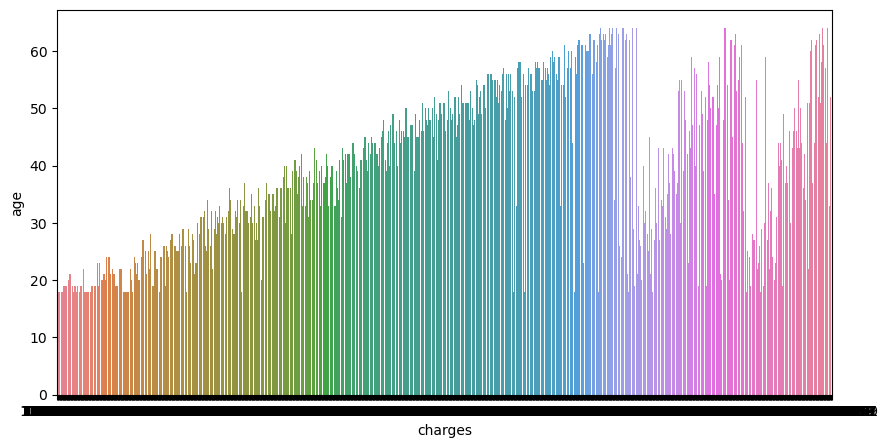

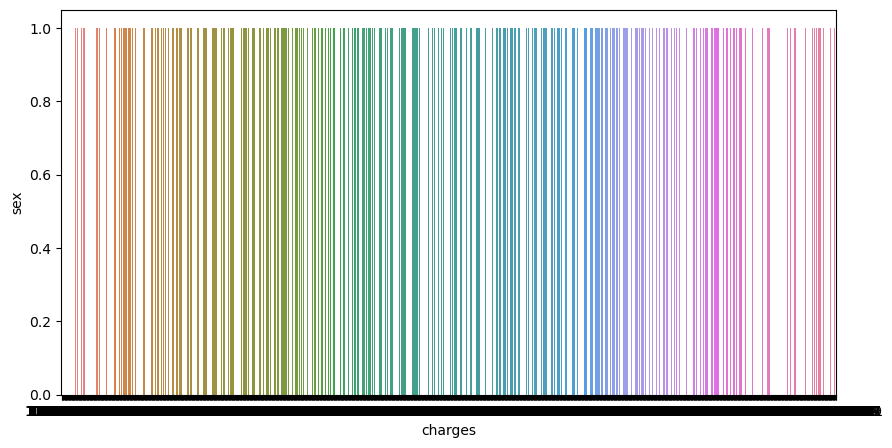

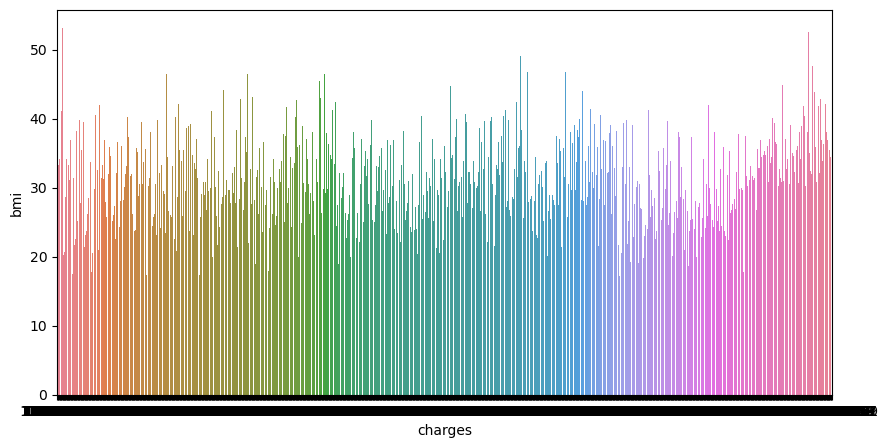

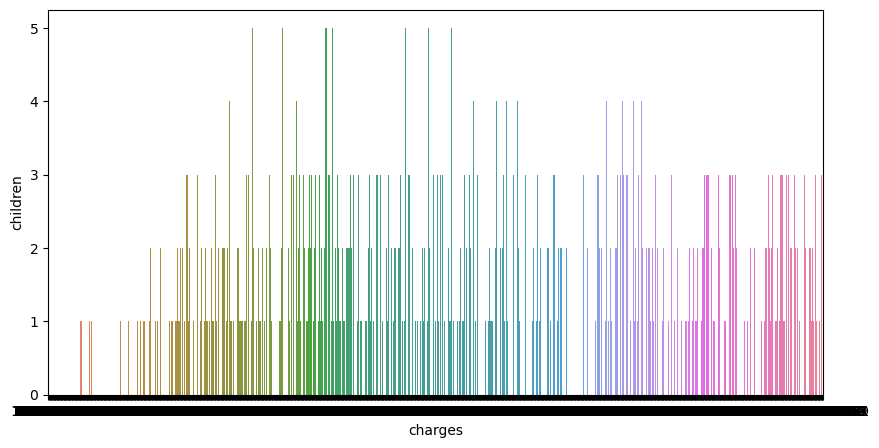

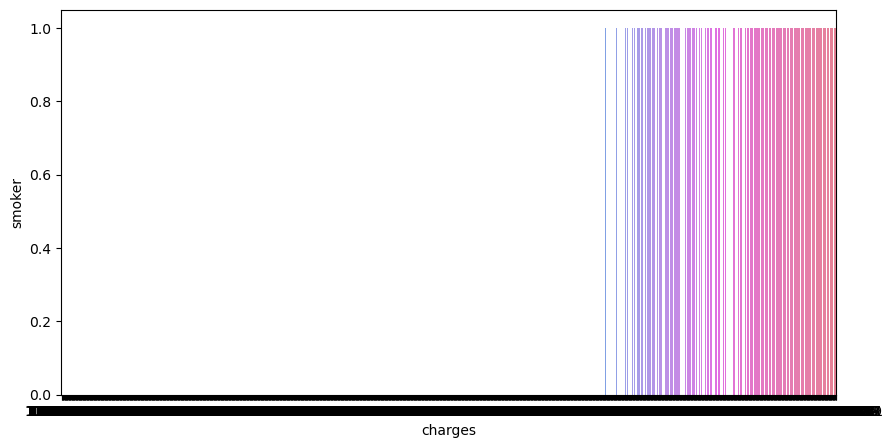

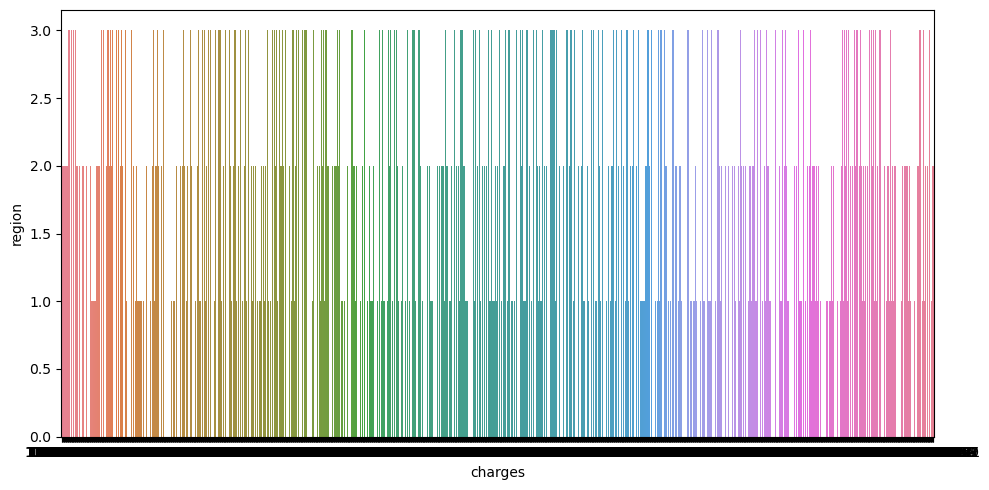

In [19]:
Index=0
labels = df['charges']
features = df.drop('charges', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[Index], data=df, palette='husl')
plt.tight_layout()
plt.show()

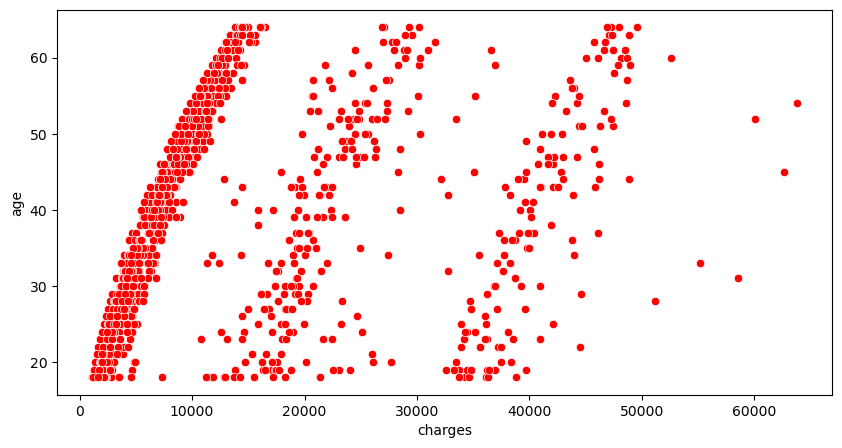

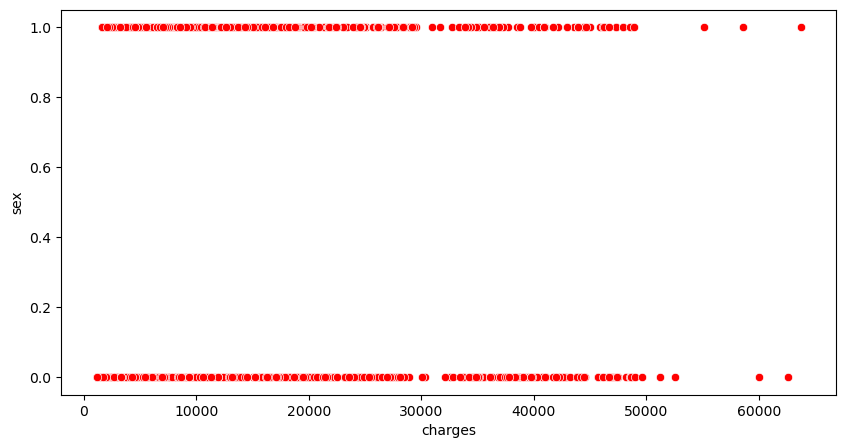

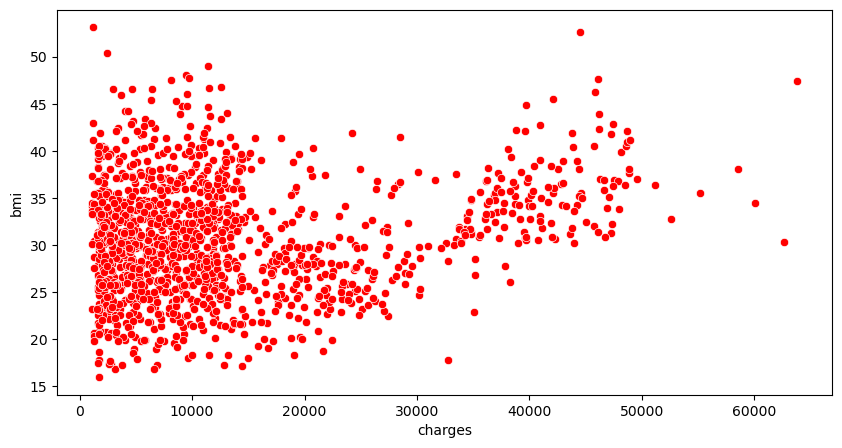

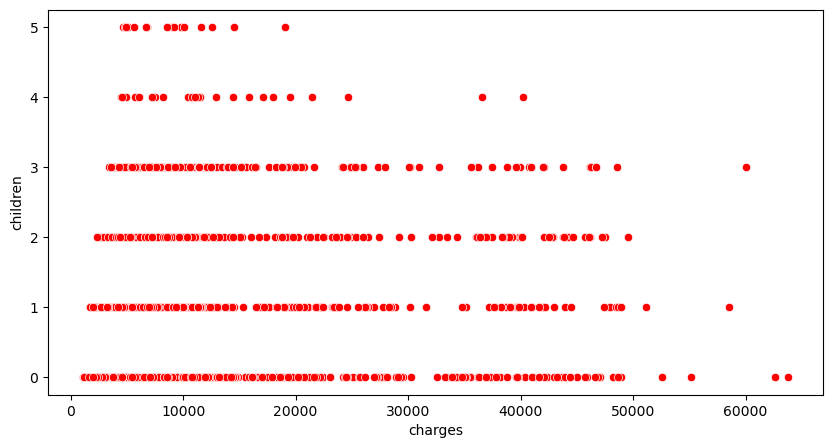

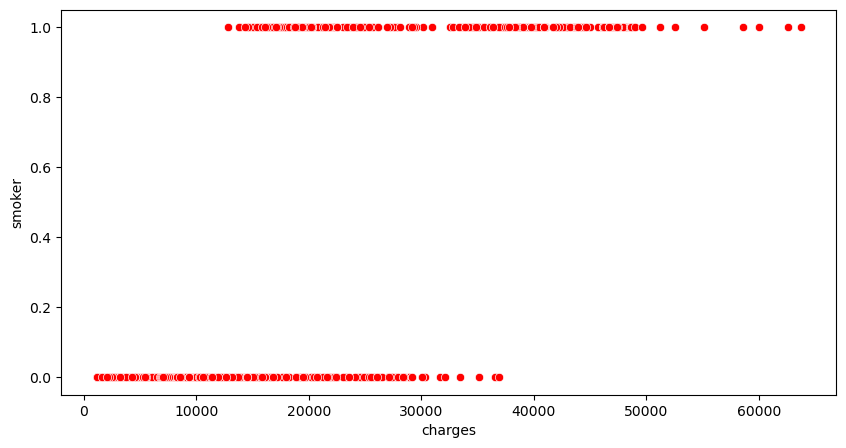

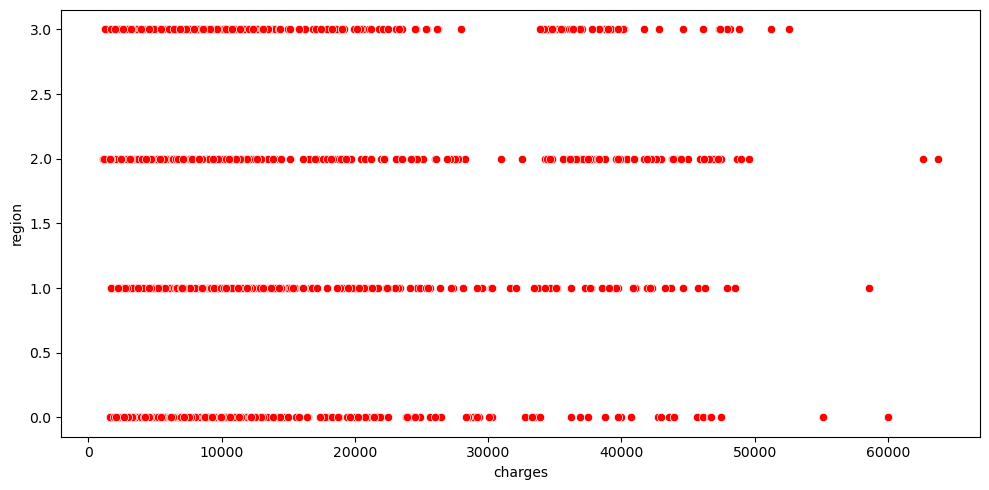

In [20]:
Index=0
labels = df['charges']
features = df.drop('charges', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=labels, y=col[Index], data=df, color="red")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

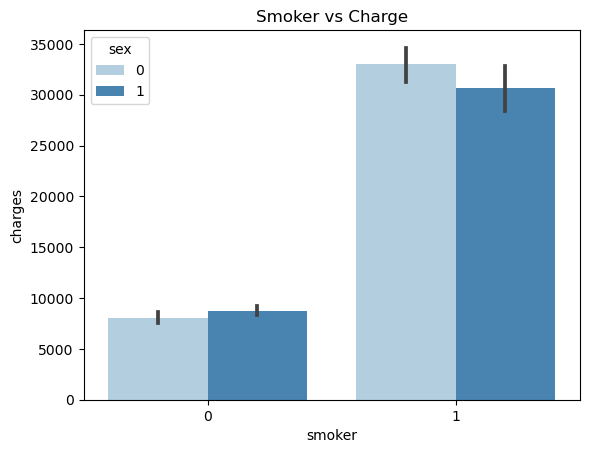

In [21]:
plt.figure()
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')

<Axes: title={'center': 'age vs Charge'}, xlabel='age', ylabel='charges'>

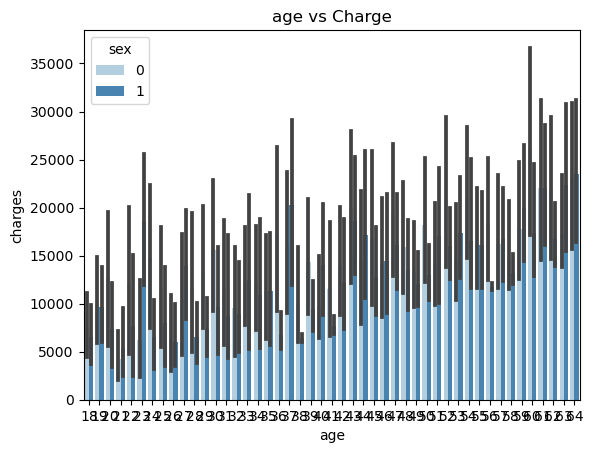

In [22]:
plt.figure()
plt.title('age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='Blues',hue='sex')

<Axes: title={'center': 'bmi vs Charge'}, xlabel='bmi', ylabel='charges'>

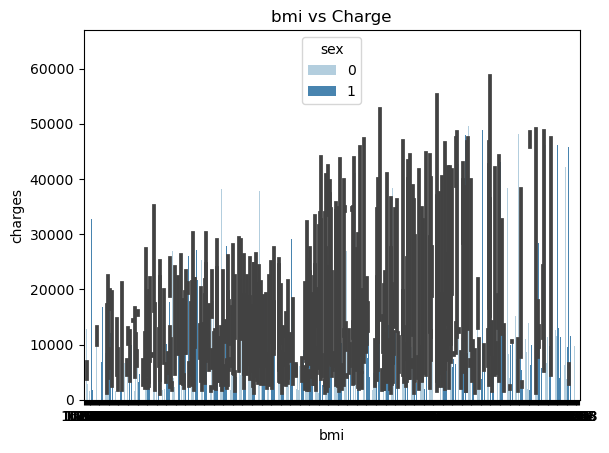

In [23]:
plt.figure()
plt.title('bmi vs Charge')
sns.barplot(x='bmi',y='charges',data=df,palette='Blues',hue='sex')

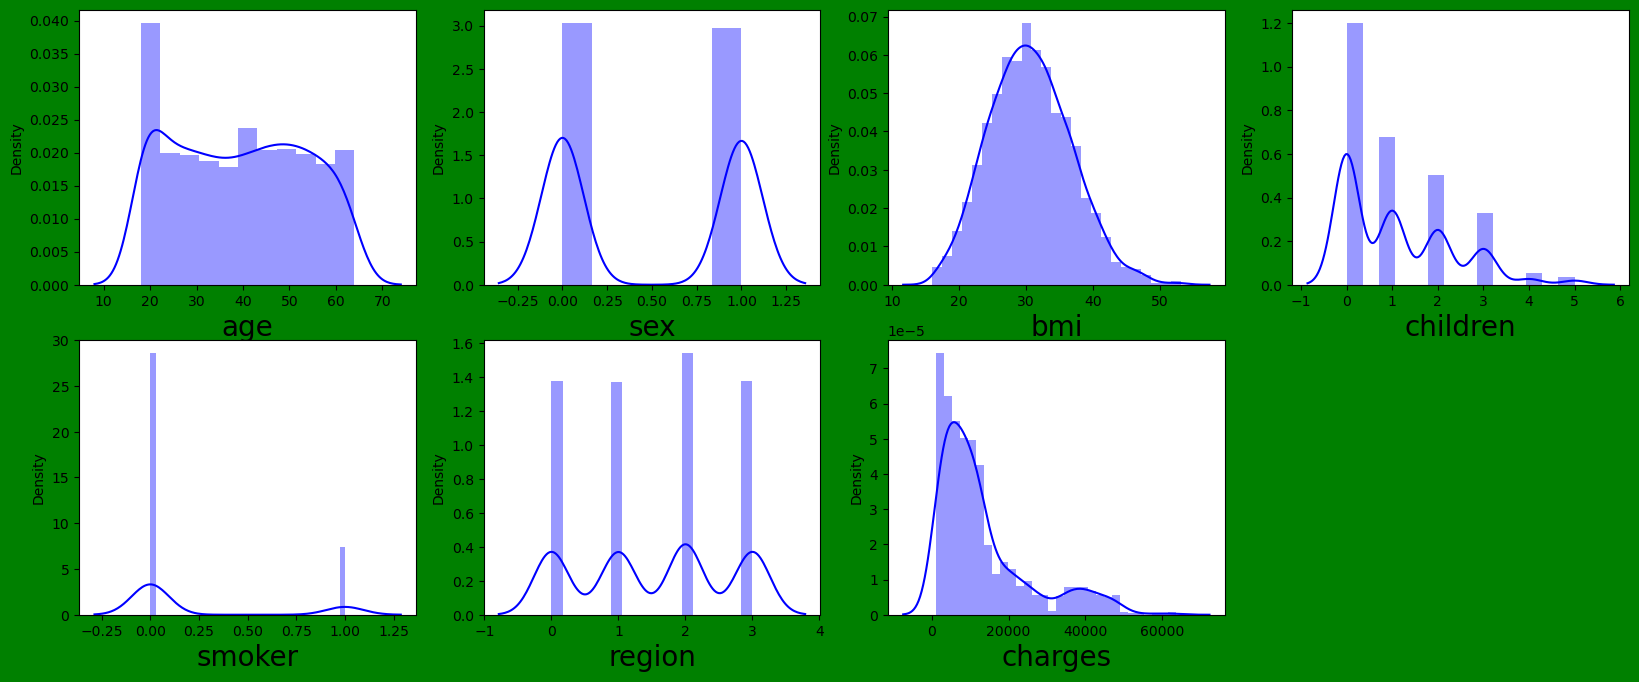

In [24]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

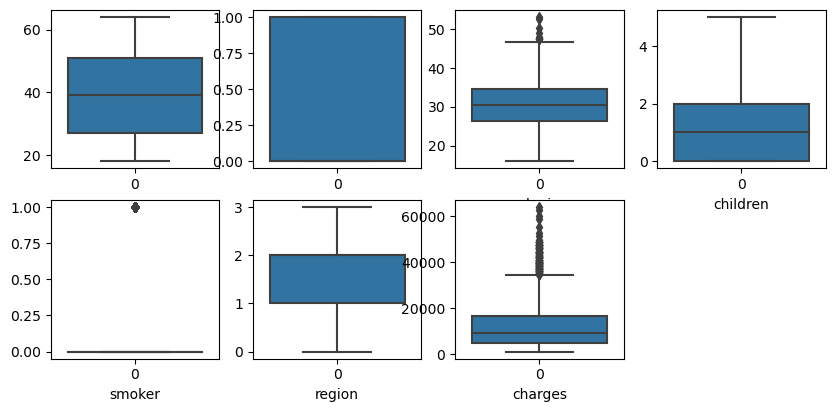

In [25]:
plt.figure(figsize=(10,7))
p=1
for i in df:
    if p<=7:
        plt.subplot(3,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1
plt.show()

There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually!

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
data = df.copy()

tempBmi = data.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data.age
tempAge = tempAge.values.reshape(-1,1)
data['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data.charges
tempCharges = tempCharges.values.reshape(-1,1)
data['charges'] = StandardScaler().fit_transform(tempCharges)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [28]:
X=data.drop('charges',axis=1).values
Y=data['charges'].values.reshape(-1,1)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix,mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [31]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    acc=r2_score(Y_test,pred) 
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is-",maxAccu,"at randomstate is -",maxRS)

Best r2_score is- 0.8162453192651768 at randomstate is - 215


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=maxRS)

In [33]:
print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (936, 6)
Size of y_train :  (936, 1)
Size of X_test :  (402, 6)
Size of Y_test :  (402, 1)


In [35]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [36]:
pred_LR=LR.predict(X_test)
pred_train=LR.predict(X_train)
print('R2_score',r2_score(y_test,pred_LR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_LR)))


R2_score 0.794726830375222
R2_score on training data 73.02191125434334
Mean absolute Error 0.3395164848070119
Mean Squared Error 0.2089363997047378
Root Mean Squared Error 0.4570956133072574


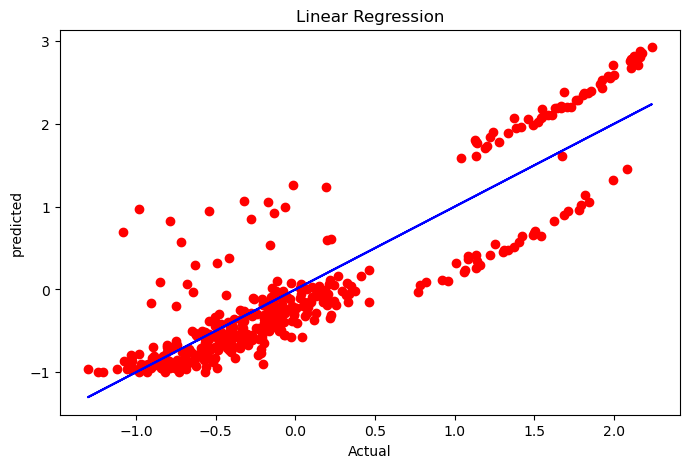

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Linear Regression')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)
print('R2_score',r2_score(y_test,pred_RFR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 0.8622700908298095
R2_score on training data 97.67841381060728
Mean absolute Error 0.21877528134410873
Mean Squared Error 0.1401877868709373
Root Mean Squared Error 0.37441659534659694


In [40]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)
print('R2_score',r2_score(y_test,pred_knn))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score 0.6910668027853921
R2_score on training data 75.65897634051375
Mean absolute Error 0.3462188829079168
Mean Squared Error 0.31444630632089465
Root Mean Squared Error 0.5607551215289029


In [41]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
pred_GBR=GBR.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2_score',r2_score(y_test,pred_GBR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 0.8918931782886184
R2_score on training data 89.82150603940359
Mean absolute Error 0.18877063322767407
Mean Squared Error 0.11003605660294524
Root Mean Squared Error 0.3317168319560303


In [42]:
lasso=Lasso()
lasso.fit(X_train, y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)
print('R2_score',r2_score(y_test,pred_lasso))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score -0.0001459123722400424
R2_score on training data 0.0
Mean absolute Error 0.7577175170391475
Mean Squared Error 1.0179941513663955
Root Mean Squared Error 1.0089569620981835


In [43]:
rd=Ridge()
rd.fit(X_train, y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)
print('R2_score',r2_score(y_test,pred_rd))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score 0.7943839337882628
R2_score on training data 73.01917538321322
Mean absolute Error 0.340732977836181
Mean Squared Error 0.2092854154990633
Root Mean Squared Error 0.4574772294869585


In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)
print('R2_score',r2_score(y_test,pred_dtr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score 0.7085022866390832
R2_score on training data 100.0
Mean absolute Error 0.26254252099353714
Mean Squared Error 0.29669967518464224
Root Mean Squared Error 0.5447014550968652


In [45]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train, y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)
print('R2_score',r2_score(y_test,pred_svr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score 0.8796480032611135
R2_score on training data 81.84624533861837
Mean absolute Error 0.19831376505367082
Mean Squared Error 0.12249975455566792
Root Mean Squared Error 0.3499996493650642


In [46]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train, y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)
print('R2_score',r2_score(y_test,pred_etr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score 0.8437250955303907
R2_score on training data 100.0
Mean absolute Error 0.21479124137827751
Mean Squared Error 0.159063729389312
Root Mean Squared Error 0.39882794459429743


In [47]:
score=cross_val_score(LR,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.76161607 0.70849126 0.77673439 0.7327692  0.75584424]
0.7470910325728581
Differences between R2score and cv score 4.763579780236382


In [48]:
score=cross_val_score(RFR,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.8534677  0.77202486 0.87222773 0.82991041 0.85306936]
0.8361400131151934
Differences between R2score and cv score 2.6130077714616173


In [49]:
score=cross_val_score(knn,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_knn)-score.mean())*100)

[0.70331306 0.66441746 0.66452122 0.65356524 0.66750243]
0.6706638843737311
Differences between R2score and cv score 2.0402918411660975


In [50]:
score=cross_val_score(GBR,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.87435307 0.79623406 0.89302407 0.85178961 0.85935007]
0.8549501748383215
Differences between R2score and cv score 3.6943003450296885


In [51]:
score=cross_val_score(lasso,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_lasso)-score.mean())*100)

[-0.00124486 -0.00059144 -0.00158471 -0.00017923 -0.00016308]
-0.0007526656095312223
Differences between R2score and cv score 0.06067532372911799


In [52]:
score=cross_val_score(rd,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_rd)-score.mean())*100)

[0.76175529 0.70886033 0.77608751 0.7331203  0.7555979 ]
0.7470842650229145
Differences between R2score and cv score 4.72996687653483


In [53]:
score=cross_val_score(dtr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_dtr)-score.mean())*100)

[0.74200093 0.65156201 0.70748816 0.74567079 0.68975202]
0.7072947805754792
Differences between R2score and cv score 0.12075060636039803


In [54]:
score=cross_val_score(svr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_svr)-score.mean())*100)

[0.86051032 0.7981448  0.85782577 0.81192836 0.82180216]
0.8300422818186366
Differences between R2score and cv score 4.960572144247688


In [55]:
score=cross_val_score(etr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_etr)-score.mean())*100)

[0.83579262 0.7421951  0.85585105 0.811514   0.84007449]
0.8170854507873868
Differences between R2score and cv score 2.6639644743003843


from the difference of both R2score and CV score computed on R2score . We can conclude that DesicionTreeRegressor as our best fitting and best performing model

In [80]:
 param={'criterion':['squared_error'], 
        'splitter':['best'], 
        'max_depth':[None], 
        'min_samples_split':[2], 
        'min_samples_leaf':[1], 
        'min_weight_fraction_leaf':[0.0],
        'max_features':[None], 
        'random_state':[None],
        'max_leaf_nodes':[None], 
        'min_impurity_decrease':[0.0], 
        'ccp_alpha':[0.0]}

In [82]:
gscv=GridSearchCV(dtr,param,cv=5)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['squared_error'],
                         'max_depth': [None], 'max_features': [None],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [None], 'splitter': ['best']})

In [83]:
gscv.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [84]:
Model=DecisionTreeRegressor(ccp_alpha=0.0,
 criterion="squared_error",
 max_depth=None,
 max_features=None,
 max_leaf_nodes= None,
 min_impurity_decrease=0.0,
 min_samples_leaf= 1,
 min_samples_split=2,
 min_weight_fraction_leaf=0.0,
 random_state=None,
 splitter='best')

In [85]:
Model.fit(X_train, y_train)
pred=Model.predict(X_test)
print('R2_score',r2_score(y_test,pred))
print('Mean absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.6806268911711537
Mean absolute Error 0.27736123943767493
Mean Squared Error 0.3250725247882269
Root Mean Squared Error 0.5701513174484708


# save model

In [87]:
import joblib
import pickle
filename='Medical cost insurance.pkl'
pickle.dump(Model,open(filename,'wb'))

In [88]:
import pickle
loaded_model=pickle.load(open('Medical cost insurance.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

68.06268911711537


In [89]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],(y_test)[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
predicted,-0.025881,-0.834201,-0.474472,2.101574,1.162747,-0.914646,0.810586,-0.086413,0.09743,-0.538383,...,0.337224,-0.505297,0.161902,-0.258502,-0.859472,-0.955597,-0.051798,-0.765356,-0.809469,-0.430445
original,[-0.09316798686034729],[-0.8898452137099537],[-0.38353532919286104],[2.2166371515911822],[-0.3411239841673239],[-0.9627582528638478],[-0.94092490207009],[-0.08653300278807358],[0.09759318914060564],[-0.6909275119523431],...,[0.3699218944056383],[-0.522863183748457],[0.0796869961679491],[-0.2665876891059078],[-0.8192268451170556],[-0.9562298320562929],[-0.08266778383200044],[-0.7772685385291416],[-0.7610026515863623],[-0.4145342359493903]
